## Preprocessing train dataset

Divide the *train* folder into two folders *mytrain* and *myvalid*

- mytrain ---- including two folders 
    - cat ---- including about 11250 cat images 
    - dog ---- including about 11250 dog images 

-  myvalid ---- including two folders 
    - cat ---- including about 1250 cat images
    - dog ---- including about 1250 dog images

In [1]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import os
import shutil
%matplotlib inline

## Visualize the size of the original *train* dataset.

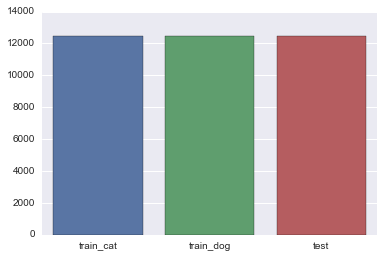

In [2]:
train_filenames = os.listdir('train')
train_cat = filter(lambda x:x[:3] == 'cat', train_filenames)
train_dog = filter(lambda x:x[:3] == 'dog', train_filenames)
x = ['train_cat', 'train_dog', 'test']
y = [len(train_cat), len(train_dog), len(os.listdir('test'))]
ax = sns.barplot(x=x, y=y)

## Shuffle and split the train filenames

In [3]:
mytrain, myvalid = train_test_split(train_filenames, test_size=0.1)
print len(mytrain), len(myvalid)

22500 2500


## Visualize the size of the processed train dataset

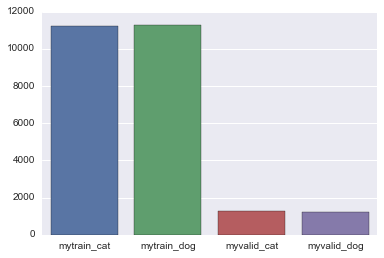

In [4]:
mytrain_cat = filter(lambda x:x[:3] == 'cat', mytrain)
mytrain_dog = filter(lambda x:x[:3] == 'dog', mytrain)
myvalid_cat = filter(lambda x:x[:3] == 'cat', myvalid)
myvalid_dog = filter(lambda x:x[:3] == 'dog', myvalid)
x = ['mytrain_cat', 'mytrain_dog', 'myvalid_cat', 'myvalid_dog']
y = [len(mytrain_cat), len(mytrain_dog), len(myvalid_cat), len(myvalid_dog)]

ax = sns.barplot(x=x, y=y)

## Create symbolic link of images

In [5]:
def remove_and_create_class(dirname):
    if os.path.exists(dirname):
        shutil.rmtree(dirname)
    os.mkdir(dirname)
    os.mkdir(dirname+'/cat')
    os.mkdir(dirname+'/dog')

remove_and_create_class('mytrain')
remove_and_create_class('myvalid')

for filename in mytrain_cat:
    os.symlink('../../train/'+filename, 'mytrain/cat/'+filename)

for filename in mytrain_dog:
    os.symlink('../../train/'+filename, 'mytrain/dog/'+filename)

for filename in myvalid_cat:
    os.symlink('../../train/'+filename, 'myvalid/cat/'+filename)

for filename in myvalid_dog:
    os.symlink('../../train/'+filename, 'myvalid/dog/'+filename)
